In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

# 1. Load the data

In [3]:
books = pd.read_csv('./data/books.csv')
ratings = pd.read_csv('./data/ratings.csv')
tags = pd.read_csv('./data/tags.csv')
book_tags = pd.read_csv('./data/book_tags.csv')
to_read = pd.read_csv('./data/to_read.csv')

# 2. Explore

## a. Books

In [5]:
print('Shape:', books.shape)
books.head()

Shape: (10000, 23)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [7]:
# Check how many rows that has a null value
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Seems like none of the important fields was missing any data. Original title could be substituted by title, and we don't need isbn or language_code (might be useful for filtering but only around 100 books were written by a non-engligh language) for our recommender system.

In [8]:
# Check the first row in the dataset
books.iloc[0]

book_id                                                                      1
goodreads_book_id                                                      2767052
best_book_id                                                           2767052
work_id                                                                2792775
books_count                                                                272
isbn                                                                 439023483
isbn13                                                             9.78044e+12
authors                                                        Suzanne Collins
original_publication_year                                                 2008
original_title                                                The Hunger Games
title                                  The Hunger Games (The Hunger Games, #1)
language_code                                                              eng
average_rating                                      

All these fields can be useful for building software, but for a recommender system not all of these are necessary. These fields below will be kept for building the recommender systems (those ratings field is better reproduced from the ratings dataframe):

1. book_id
2. goodreads_book_id
3. authors
4. title

In [5]:
books[['book_id', 'goodreads_book_id', 'authors', 'title']].to_feather('./feather/books')

## b. Ratings

In [11]:
print('Shape:', ratings.shape)
ratings.head()

Shape: (5976479, 3)


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [13]:
# Since the datasets doesn't contain an user dataset, let's check how many users are there
print('Number of users:', len(ratings.user_id.unique()))

Number of users: 53424


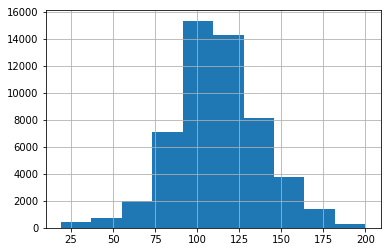

In [14]:
# The number of ratings each user gives
ratings.groupby('user_id').size().hist()

## c. Tags

In [15]:
print('Shape:', tags.shape)
tags.head()

Shape: (34252, 2)


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


Seems like it needs a dire refactor and filter, since tag_name makes no sense

## d. Book tags

In [16]:
print('Shape:', book_tags.shape)
book_tags.head()

Shape: (999912, 3)


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [18]:
tags_count = book_tags.groupby('tag_id').count()
len(tags_count[tags_count['count'] == 1])

17157

There's 17157 tags that are only added to one book. They probably don't matter in our recommender system since we can't use them to make any connection.

In [19]:
len(tags_count[tags_count['count'] < 5])

25267

Actually there're 25k tags out of 34k tags that are added to less than 5 books. We will probably remove them. Need more experiment on this.

In [20]:
tags_keep = tags_count[tags_count['count'] > 4].index
tags.iloc[tags_keep].head(10)

,tag_id,tag_name
0,0,-
23,23,-dean
27,27,-fictitious
41,41,-post
43,43,-read
47,47,0
71,71,00-in-class
84,84,007
90,90,01-folklore
98,98,02-fantasy


Look much more reasonable than those meaningless tags earlier. However I'm not sure if I'm going to use them in the earlier version of the recommender system since it needs more cleaning.

## e. To read

In [ ]:
print('Shape:', to_read.shape)
to_read.head